# MACS 30200 Homework 2

## Ling Dai

### Import Libraries and Datasets

In [28]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from matplotlib import pyplot as plt 

In [13]:
#import data

train_df = pd.read_csv('C:/Users/Ling.D/Desktop/congress_train.txt',
                      encoding = "ISO-8859-1")
test_df = pd.read_csv('C:/Users/Ling.D/Desktop/congress_test.txt',
                     encoding = "ISO-8859-1")
val_df =pd.read_csv('C:/Users/Ling.D/Desktop/congress_val.txt',
                   encoding = "ISO-8859-1")

train_df[:1]

,BillID,BillNum,Title,Major
0,80-HR-1,1,To reduce individual income tax payments,1


### Data Pre-processing

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

#tokenizer
t1 = Tokenizer(num_words=10000)
t1.fit_on_texts(train_df['Title'])

In [18]:
train_x = pad_sequences(t1.texts_to_sequences(train_df['Title']), maxlen=100,
                        padding='post', truncating='post')
test_x = pad_sequences(t1.texts_to_sequences(test_df['Title']), maxlen=100,
                        padding='post', truncating='post')
val_x = pad_sequences(t1.texts_to_sequences(val_df['Title']), maxlen=100,
                        padding='post', truncating='post')

In [21]:
train_y = to_categorical(train_df['Major'])
test_y = to_categorical(test_df['Major'])
val_y = to_categorical(val_df['Major'])

### Initial Model

In [24]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

#base-line model

bl = Sequential()
bl.add(Embedding(10000,24, input_length=100))
bl.add(Flatten())
bl.add(Dense(24, activation='softmax'))
bl.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

bl_history = bl.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 18s 66us/step - loss: 1.2175 - acc: 0.6738 - val_loss: 0.7448 - val_acc: 0.8020
Epoch 2/50
278612/278612 [==============================] - 17s 61us/step - loss: 0.6644 - acc: 0.8234 - val_loss: 0.6521 - val_acc: 0.8275
Epoch 3/50
278612/278612 [==============================] - 17s 60us/step - loss: 0.5888 - acc: 0.8437 - val_loss: 0.6265 - val_acc: 0.8352
Epoch 4/50
278612/278612 [==============================] - 17s 61us/step - loss: 0.5492 - acc: 0.8543 - val_loss: 0.6191 - val_acc: 0.8398
Epoch 5/50
278612/278612 [==============================] - 17s 60us/step - loss: 0.5227 - acc: 0.8617 - val_loss: 0.6180 - val_acc: 0.8414
Epoch 6/50
278612/278612 [==============================] - 18s 65us/step - loss: 0.5037 - acc: 0.8669 - val_loss: 0.6209 - val_acc: 0.8425
Epoch 7/50
278612/278612 [==============================] - 1

### RNN

In [36]:
from keras.layers import SimpleRNN

rnn = Sequential()
rnn.add(Embedding(10000,24, input_length=100))
rnn.add(SimpleRNN(24))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

rnn_history = rnn.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=64) 

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 68s 245us/step - loss: 2.7812 - acc: 0.1573 - val_loss: 2.6635 - val_acc: 0.2037
Epoch 2/50
278612/278612 [==============================] - 69s 246us/step - loss: 2.6610 - acc: 0.2119 - val_loss: 2.6637 - val_acc: 0.2040
Epoch 3/50
278612/278612 [==============================] - 69s 246us/step - loss: 2.4194 - acc: 0.3117 - val_loss: 2.3443 - val_acc: 0.3440
Epoch 4/50
278612/278612 [==============================] - 68s 246us/step - loss: 2.2491 - acc: 0.3742 - val_loss: 2.6159 - val_acc: 0.2499
Epoch 5/50
278612/278612 [==============================] - 69s 246us/step - loss: 2.1346 - acc: 0.4084 - val_loss: 2.1102 - val_acc: 0.4159
Epoch 6/50
278612/278612 [==============================] - 71s 254us/step - loss: 2.0274 - acc: 0.4324 - val_loss: 2.2652 - val_acc: 0.3815
Epoch 7/50
278612/278612 [==============================] - 68s 243us/step - loss: 1.9363 - acc: 0.4544

### LSTM

In [37]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(10000,24, input_length=100))
lstm.add(LSTM(24))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

lstm_history = lstm.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=64) 

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 201s 722us/step - loss: 2.4156 - acc: 0.2386 - val_loss: 2.0548 - val_acc: 0.3542
Epoch 2/50
278612/278612 [==============================] - 199s 713us/step - loss: 1.8943 - acc: 0.4128 - val_loss: 1.6857 - val_acc: 0.5023
Epoch 3/50
278612/278612 [==============================] - 195s 702us/step - loss: 1.4428 - acc: 0.5915 - val_loss: 1.2638 - val_acc: 0.6575
Epoch 4/50
278612/278612 [==============================] - 194s 697us/step - loss: 1.0823 - acc: 0.7207 - val_loss: 1.0115 - val_acc: 0.7434
Epoch 5/50
278612/278612 [==============================] - 191s 686us/step - loss: 0.9015 - acc: 0.7745 - val_loss: 0.8708 - val_acc: 0.7814
Epoch 6/50
278612/278612 [==============================] - 193s 692us/step - loss: 0.7883 - acc: 0.8026 - val_loss: 0.7682 - val_acc: 0.8060
Epoch 7/50
278612/278612 [==============================] - 197s 708us/step - loss: 0.7081 - acc:

### GRU

In [38]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000,24, input_length=100))
gru.add(GRU(24))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

gru_history = gru.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=64) 

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 165s 592us/step - loss: 2.4050 - acc: 0.2423 - val_loss: 1.9149 - val_acc: 0.4227
Epoch 2/50
278612/278612 [==============================] - 164s 588us/step - loss: 1.5529 - acc: 0.5622 - val_loss: 1.2865 - val_acc: 0.6646
Epoch 3/50
278612/278612 [==============================] - 164s 589us/step - loss: 1.0615 - acc: 0.7313 - val_loss: 0.9167 - val_acc: 0.7742
Epoch 4/50
278612/278612 [==============================] - 165s 592us/step - loss: 0.8182 - acc: 0.7945 - val_loss: 0.7715 - val_acc: 0.8043
Epoch 5/50
278612/278612 [==============================] - 169s 606us/step - loss: 0.7012 - acc: 0.8188 - val_loss: 0.6894 - val_acc: 0.8197
Epoch 6/50
278612/278612 [==============================] - 169s 607us/step - loss: 0.6421 - acc: 0.8306 - val_loss: 0.6490 - val_acc: 0.8280
Epoch 7/50
278612/278612 [==============================] - 169s 607us/step - loss: 0.6047 - acc:

### Additional Models

In [51]:
from keras.layers import Dropout

add1 = Sequential()
add1.add(Embedding(10000,48, input_length=100))
add1.add(Flatten())
add1.add(Dense(24, activation='relu'))
add1.add(Dense(24, activation='softmax'))
add1.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

add1_history = add1.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                     epochs=50, batch_size=64) 

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 51s 182us/step - loss: 1.1154 - acc: 0.7057 - val_loss: 0.7104 - val_acc: 0.8124
Epoch 2/50
278612/278612 [==============================] - 48s 173us/step - loss: 0.6252 - acc: 0.8349 - val_loss: 0.6315 - val_acc: 0.8351
Epoch 3/50
278612/278612 [==============================] - 46s 164us/step - loss: 0.5419 - acc: 0.8561 - val_loss: 0.6311 - val_acc: 0.8393
Epoch 4/50
278612/278612 [==============================] - 45s 162us/step - loss: 0.4973 - acc: 0.8689 - val_loss: 0.6542 - val_acc: 0.8414
Epoch 5/50
278612/278612 [==============================] - 45s 162us/step - loss: 0.4720 - acc: 0.8769 - val_loss: 0.6837 - val_acc: 0.8348
Epoch 6/50
278612/278612 [==============================] - 45s 163us/step - loss: 0.4586 - acc: 0.8812 - val_loss: 0.7101 - val_acc: 0.8360
Epoch 7/50
278612/278612 [==============================] - 45s 162us/step - loss: 0.4532 - acc: 0.8841

In [52]:
from keras import regularizers

add2 = Sequential()
add2.add(Embedding(10000,24, input_length=100,
                   activity_regularizer = regularizers.l2(0.01)))
add2.add(Flatten())
add2.add(Dense(24, activation='softmax'))
add2.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

add2_history = add2.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=64)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 25s 89us/step - loss: 1.7716 - acc: 0.6344 - val_loss: 1.2322 - val_acc: 0.7836
Epoch 2/50
278612/278612 [==============================] - 23s 83us/step - loss: 1.0992 - acc: 0.8002 - val_loss: 1.0234 - val_acc: 0.8061
Epoch 3/50
278612/278612 [==============================] - 23s 84us/step - loss: 0.9689 - acc: 0.8135 - val_loss: 0.9488 - val_acc: 0.8084
Epoch 4/50
278612/278612 [==============================] - 23s 81us/step - loss: 0.9101 - acc: 0.8194 - val_loss: 0.9163 - val_acc: 0.8132
Epoch 5/50
278612/278612 [==============================] - 23s 83us/step - loss: 0.8760 - acc: 0.8217 - val_loss: 0.8904 - val_acc: 0.8136
Epoch 6/50
278612/278612 [==============================] - 23s 82us/step - loss: 0.8525 - acc: 0.8246 - val_loss: 0.8664 - val_acc: 0.8176
Epoch 7/50
278612/278612 [==============================] - 22s 79us/step - loss: 0.8359 - acc: 0.8258 - val_

In [53]:
add3 = Sequential()
add3.add(Embedding(10000,24, input_length=100))
add3.add(Flatten())
add3.add(Dense(24, activation='softmax'))
add3.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

add3_history = add3.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=32)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 45s 160us/step - loss: 1.1290 - acc: 0.6988 - val_loss: 0.7398 - val_acc: 0.8062
Epoch 2/50
278612/278612 [==============================] - 41s 146us/step - loss: 0.6755 - acc: 0.8241 - val_loss: 0.6735 - val_acc: 0.8249
Epoch 3/50
278612/278612 [==============================] - 40s 145us/step - loss: 0.6120 - acc: 0.8419 - val_loss: 0.6573 - val_acc: 0.8325
Epoch 4/50
278612/278612 [==============================] - 41s 146us/step - loss: 0.5790 - acc: 0.8509 - val_loss: 0.6585 - val_acc: 0.8354
Epoch 5/50
278612/278612 [==============================] - 41s 145us/step - loss: 0.5592 - acc: 0.8567 - val_loss: 0.6623 - val_acc: 0.8362
Epoch 6/50
278612/278612 [==============================] - 41s 146us/step - loss: 0.5443 - acc: 0.8613 - val_loss: 0.6725 - val_acc: 0.8377
Epoch 7/50
278612/278612 [==============================] - 41s 148us/step - loss: 0.5347 - acc: 0.8644

In [54]:
add4 = Sequential()
add4.add(Embedding(10000,24, input_length=100))
add4.add(Flatten())
add4.add(Dense(24, activation='softmax'))
add4.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

add4_history = add4.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=128)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 20s 72us/step - loss: 1.3644 - acc: 0.6323 - val_loss: 0.7861 - val_acc: 0.7904
Epoch 2/50
278612/278612 [==============================] - 16s 57us/step - loss: 0.6814 - acc: 0.8193 - val_loss: 0.6484 - val_acc: 0.8263
Epoch 3/50
278612/278612 [==============================] - 16s 57us/step - loss: 0.5840 - acc: 0.8430 - val_loss: 0.6114 - val_acc: 0.8377
Epoch 4/50
278612/278612 [==============================] - 16s 57us/step - loss: 0.5366 - acc: 0.8552 - val_loss: 0.5965 - val_acc: 0.8415
Epoch 5/50
278612/278612 [==============================] - 16s 58us/step - loss: 0.5056 - acc: 0.8639 - val_loss: 0.5901 - val_acc: 0.8457
Epoch 6/50
278612/278612 [==============================] - 16s 58us/step - loss: 0.4821 - acc: 0.8701 - val_loss: 0.5887 - val_acc: 0.8469
Epoch 7/50
278612/278612 [==============================] - 16s 58us/step - loss: 0.4637 - acc: 0.8755 - val_

In [57]:
add5 = Sequential()
add5.add(Embedding(10000,24, input_length=100,
                   embeddings_regularizer = regularizers.l2(0.01)))
add5.add(Flatten())
add5.add(Dense(24, activation='softmax'))
add5.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
          metrics=['accuracy'])

add5_history = add5.fit(train_x, train_y,
                    validation_data=(val_x, val_y),
                   epochs=50, batch_size=64)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 35s 125us/step - loss: 2.2607 - acc: 0.4102 - val_loss: 1.9042 - val_acc: 0.5435
Epoch 2/50
278612/278612 [==============================] - 33s 119us/step - loss: 1.6997 - acc: 0.6208 - val_loss: 1.5578 - val_acc: 0.6656
Epoch 3/50
278612/278612 [==============================] - 34s 122us/step - loss: 1.4592 - acc: 0.6849 - val_loss: 1.4033 - val_acc: 0.6844
Epoch 4/50
278612/278612 [==============================] - 34s 121us/step - loss: 1.3390 - acc: 0.7094 - val_loss: 1.3087 - val_acc: 0.7147
Epoch 5/50
278612/278612 [==============================] - 34s 123us/step - loss: 1.2655 - acc: 0.7242 - val_loss: 1.2494 - val_acc: 0.7212
Epoch 6/50
278612/278612 [==============================] - 34s 124us/step - loss: 1.2166 - acc: 0.7331 - val_loss: 1.2094 - val_acc: 0.7344
Epoch 7/50
278612/278612 [==============================] - 34s 120us/step - loss: 1.1804 - acc: 0.7391

### Compare Models

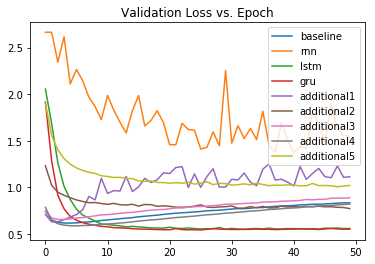

In [67]:
#graphical comparison: validation loss

plt.plot(bl_history.history['val_loss'])
plt.plot(rnn_history.history['val_loss'])
plt.plot(lstm_history.history['val_loss'])
plt.plot(gru_history.history['val_loss'])
plt.plot(add1_history.history['val_loss'])
plt.plot(add2_history.history['val_loss'])
plt.plot(add3_history.history['val_loss'])
plt.plot(add4_history.history['val_loss'])
plt.plot(add5_history.history['val_loss'])
plt.legend(['baseline','rnn','lstm','gru','additional1','additional2','additional3','additional4','additional5'],
          loc='upper right')
plt.title('Validation Loss vs. Epoch')
plt.show()

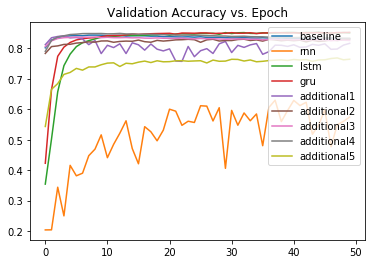

In [68]:
#graphical comparison: validation accuracy
plt.plot(bl_history.history['val_acc'])
plt.plot(rnn_history.history['val_acc'])
plt.plot(lstm_history.history['val_acc'])
plt.plot(gru_history.history['val_acc'])
plt.plot(add1_history.history['val_acc'])
plt.plot(add2_history.history['val_acc'])
plt.plot(add3_history.history['val_acc'])
plt.plot(add4_history.history['val_acc'])
plt.plot(add5_history.history['val_acc'])
plt.legend(['baseline','rnn','lstm','gru','additional1','additional2','additional3','additional4','additional5'],
           loc='upper right')
plt.title('Validation Accuracy vs. Epoch')
plt.show()

In [62]:
#numerical comparison: lowest validation loss achieved

print(min(bl_history.history['val_loss']))
print(min(rnn_history.history['val_loss']))
print(min(lstm_history.history['val_loss']))
print(min(gru_history.history['val_loss']))
print(min(add1_history.history['val_loss']))
print(min(add2_history.history['val_loss']))
print(min(add3_history.history['val_loss']))
print(min(add4_history.history['val_loss']))
print(min(add5_history.history['val_loss']))

0.6179668922648807
1.3759943318128411
0.5508070102376256
0.5451652196189997
0.6311412354080718
0.7734858681204694
0.6572510120531041
0.5886575411609652
1.0073351199927234


### Final Model

According to the previous seciton, the model with a GRU layer performed the best. Therefore, we use it as our final model and evaluate it against our test data. According to the plots, the performance of the model doesn't deteriorate as the number of epochs increases. Therefore, we can simply using our previously fitted model (epochs=50) for testing.

In [71]:
gru.evaluate(test_x,test_y)

38693/38693 [==============================] - 11s 272us/step


[1.7981837348520464, 0.44845320859147136]

According to the results above, the accuracy of prediction evluated using the test set is only around 45%, which is significantly lower than that of hand-coding. To further improve upon the performance of NNs, we need to further fine-tune the model through adjusting hyperparameters.